In [3]:
import re
import numpy as np
import pandas as pd

In [4]:
GPXfile='Lunch_Walk.gpx'
data = open(GPXfile).read()

In [205]:
lat = np.array(re.findall(r'lat="([^"]+)',data),dtype=float)
lon = np.array(re.findall(r'lon="([^"]+)',data),dtype=float)
time = re.findall(r'<time>([^\<]+)',data)
dt = pd.to_datetime(time)
s = dt.astype(int)

coords = np.array(list(zip(lat,lon,time,dt,s)))


coords = coords[::1]
coords[5]


coords.shape

(6614, 5)

In [206]:
X = coords[:, -2].reshape(-1, 1)
Xsec = coords[:, -1].reshape(-1, 1).astype(np.float64)



Y0 = coords[:, 0].reshape(-1, 1).astype(np.float64)
Y1 = coords[:, 1].reshape(-1, 1).astype(np.float64)

Y=np.array(list(zip(Y0,Y1)))




#centre time data - Cholesky decomposition was not successful.
Xm = Xsec.mean()
Xs = Xsec.std()

# Xsec = (Xsec - Xsec.mean()) / Xsec.std()
Xsec -= Xsec.min()
Xsec /= Xsec.max()

# Ym = Y.mean()
# Ys = Y.std()
# Yv = (Y - Y.mean()) / Y.std()

Yv=Y

In [240]:

Yi = Yv.astype(np.float64)
#coords[:, 0].reshape(-1, 1).astype(np.float64)
Xi = coords[:, -1].reshape(-1, 1).astype(np.float64)

second = 1000000000

resolution = 0.0008
timegap = 60*second


xtest= []
ytest=[]

Xarr = []
Yarr = []
Yold = [-999,-999]
Xold = -999
for j in range(len(Xi)):
    i = Yi[j][0][0]
    k = Yi[j][1][0]
    if abs(i-Yold[0])>resolution:
        Yarr.append([i,k])
        Yold=[i,k]
        Xold = Xi[j]
        Xarr.append(Xi[j])
    elif abs(Xi[j]-Xold)>timegap:
        Yarr.append([i,k])
        Yold=[i,k]
        Xold = Xi[j]
        Xarr.append(Xi[j])
    elif abs(k-Yold[1])>resolution:
        Yarr.append([i,k])
        Yold=[i,k]
        Xold = Xi[j]
        Xarr.append(Xi[j])
    else:
        xtest.append(Xi[j])
        ytest.append([i,k])
 
        
len(Yarr)

Xarr= np.array(Xarr).reshape(-1, 1).astype(np.float64)
Yarr= np.array(Yarr)#.reshape(-1, 1).astype(np.float64)


xtest= np.array(xtest)
ytest = np.array(ytest)




xtest -= Xarr.min()
Xarr -= Xarr.min()
xtest -= Xarr.max()
Xarr /= Xarr.max()




means=[]
scales = []
for q in [0,1]:

#     '''
    scale = 1/Yarr[:,q].std()
    Yarr[:,q]=Yarr[:,q]*scale #1/resolution
    scales.append(scale)
    
    Ym = Yarr[:,q].mean()
    Yarr[:,q] = Yarr[:,q]-Ym
    means.append(Ym)
    
    
    
    
    
    ytest[:,q]=ytest[:,q]*scale #1/resolution
    ytest[:,q] = ytest[:,q]-Ym

    
    
    
#     '''
    
    
    
    
    # Yarr*=100#1/resolution
    

    # Ym = Yarr.mean()
    # Ys = Yarr.std()
    # Yarr = (Yarr - Yarr.mean()) / Yarr.std()

Yarr.shape


X=Xarr
Y=Yarr
Y.shape,means,scales,Yarr[:,0],q
Yi

array([[[51.504613],
        [-0.141894]],

       [[51.504624],
        [-0.141901]],

       [[51.504633],
        [-0.141906]],

       ...,

       [[51.499653],
        [-0.141922]],

       [[51.49966 ],
        [-0.141926]],

       [[51.499661],
        [-0.141926]]])

In [241]:
# !pip install lazypredict 
# !conda install -c anaconda lightgbm
# brew install libomp

# !sudo conda install -c anaconda py-xgboost
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split


In [242]:
from sklearn import datasets

In [243]:
X_train, X_test, y_train, y_test = train_test_split(Xsec.flatten(), Y0.flatten(), test_size=.5, random_state=42)

In [244]:
Xarr=Xarr.flatten()
Yarr = Yarr[:,1].flatten()*1000
xtest = np.array(xtest).flatten()
ytest = np.array(ytest)[:,1].flatten()*1000


In [245]:
ytest

array([851.30885557, 851.14359259, 850.48254067, ..., 850.42745301,
       850.20710237, 850.20710237])

In [246]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(Xarr, xtest, Yarr, ytest)


100%|██████████| 39/39 [00:01<00:00, 32.06it/s]

[00:05:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [247]:
models

,R-Squared,RMSE,Time Taken
Model,,,
LassoCV,0.00,1020.55,0.06
GaussianProcessRegressor,-0.00,1021.73,0.04
DummyRegressor,-0.00,1021.73,0.01
LassoLarsCV,-0.00,1021.73,0.01
LarsCV,-0.00,1021.73,0.01
NuSVR,-0.00,1022.97,0.02
SVR,-0.01,1026.96,0.02
AdaBoostRegressor,-0.36,1190.23,0.03
LGBMRegressor,-0.39,1204.00,0.04


In [248]:

predictions


,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GaussianProcessRegressor,...,PassiveAggressiveRegressor,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,XGBRegressor,LGBMRegressor
0,584.41,850.93,-16255552283410486.00,851.97,0.00,-11129981381663700.00,-1513151955163857.00,851.97,851.97,0.00,...,-22016876833931924.00,-31427780367891316.00,850.41,-16646288655957308.00,-16029759446477426.00,-16670595480547202.00,80.05,-16717731954909914.00,840.50,610.73
1,584.41,850.93,-16254036331504918.00,851.97,0.00,-11128943427604046.00,-1513010842419740.25,851.97,851.97,0.00,...,-22014823595394768.00,-31424849492169236.00,850.41,-16644736264960762.00,-16028264551443714.00,-16669040822757354.00,80.05,-16716172901291066.00,840.50,610.73
2,584.41,850.93,-16252520379599348.00,851.97,0.00,-11127905473544392.00,-1512869729675623.25,851.97,851.97,0.00,...,-22012770356857608.00,-31421918616447148.00,850.41,-16643183873964214.00,-16026769656410002.00,-16667486164967502.00,80.05,-16714613847672216.00,840.50,610.73
3,584.41,850.93,-16249488475788212.00,851.97,0.00,-11125829565425086.00,-1512587504187390.00,851.97,851.97,0.00,...,-22008663879783296.00,-31416056865002984.00,850.41,-16640079091971124.00,-16023779866342582.00,-16664376849387806.00,80.05,-16711495740434520.00,840.50,610.73
4,584.41,850.93,-16246456571977076.00,851.97,0.00,-11123753657305778.00,-1512305278699156.50,851.97,851.97,0.00,...,-22004557402708984.00,-31410195113558820.00,850.41,-16636974309978034.00,-16020790076275162.00,-16661267533808110.00,80.05,-16708377633196824.00,840.50,610.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6376,835.03,883.42,28803086204938.05,851.69,0.00,19721127132824.58,2681142138137.87,851.69,851.69,0.00,...,39011532204799.19,55686638717928.04,873.08,29495428933481.12,28403005639648.52,29538498006240.32,80.05,29622018757229.96,847.43,725.31
6377,835.03,883.42,31834990016074.79,851.69,0.00,21797035252131.32,2963367626371.35,851.69,851.69,0.00,...,43118009279112.48,61548390162092.86,873.08,32600210926571.93,31392795707069.30,32647813585937.48,80.05,32740125994926.32,847.43,725.31
6378,835.03,883.42,33350941921643.16,851.69,0.00,22834989311784.70,3104480370488.08,851.69,851.69,0.00,...,45171247816269.13,64479265884175.27,873.08,34152601923117.34,32887690740779.70,34202471375786.05,80.05,34299179613774.50,847.43,725.31
6379,835.03,883.42,36382845732779.90,851.69,0.00,24910897431091.44,3386705858721.56,851.69,851.69,0.00,...,49277724890582.43,70341017328340.09,873.08,37257383916208.16,35877480808200.49,37311786955483.21,80.05,37417286851470.86,847.43,725.31


In [249]:
lim = 2000

a = predictions[models[models.RMSE<lim].index]
a['real']=ytest
a.head(10)
# xtest,ytest,Xarr,Yarr

,LassoCV,GaussianProcessRegressor,DummyRegressor,LassoLarsCV,LarsCV,NuSVR,SVR,AdaBoostRegressor,LGBMRegressor,HistGradientBoostingRegressor,XGBRegressor,KNeighborsRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,DecisionTreeRegressor,ExtraTreeRegressor,ExtraTreesRegressor,real
0,-8.53,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,851.31
1,-8.53,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,851.14
2,-8.53,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,850.48
3,-8.53,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,850.10
4,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,849.71
5,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,849.27
6,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,848.83
7,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,848.22
8,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,847.78
9,-8.52,0.00,0.00,0.00,0.00,30.28,80.05,584.41,610.73,626.69,840.50,843.77,845.12,850.41,850.93,851.97,851.97,851.97,847.45


<Figure size 432x288 with 0 Axes>

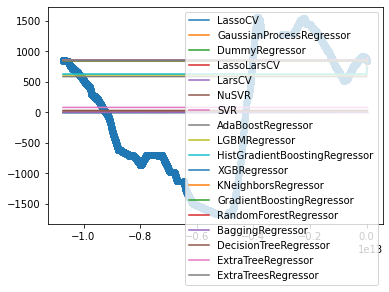

In [250]:
plt.figure()
predictions.index = xtest
ax = predictions[models[models.RMSE<lim].index].plot()
ax.scatter(xtest,ytest)

In [251]:
import matplotlib.pyplot as plt
plt.show()

In [252]:
reg.fit(xtest,xtest,ytest,ytest)



 90%|████████▉ | 35/39 [00:24<00:03,  1.33it/s]

[00:06:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



100%|██████████| 39/39 [00:24<00:00,  1.58it/s]


(                               R-Squared    RMSE  Time Taken
 Model                                                       
 DecisionTreeRegressor               1.00    0.00        0.03
 ExtraTreesRegressor                 1.00    0.00        0.55
 ExtraTreeRegressor                  1.00    0.00        0.02
 RandomForestRegressor               1.00    0.56        0.89
 BaggingRegressor                    1.00    0.74        0.09
 KNeighborsRegressor                 1.00    1.21        0.06
 GradientBoostingRegressor           1.00   13.30        0.29
 XGBRegressor                        1.00   13.30        0.22
 LGBMRegressor                       1.00   15.91        0.12
 HistGradientBoostingRegressor       1.00   16.20        0.61
 GaussianProcessRegressor            0.98  130.91        8.75
 AdaBoostRegressor                   0.98  158.79        0.20
 SVR                                 0.74  520.92        2.31
 NuSVR                               0.69  569.90        1.69
 MLPRegr